In [1]:
from scipy import stats
import scipy.stats
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
# %matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML 

**Генеральная совокупность** - все люди, которые подходят для наших тестов

**выборка** = Часть генеральной совокупности   

**Стратифицированная выборка** - выборка по группам (М и Ж, в выборке пропорции те же что и в ГС)  
**Групповая выборка** - разбить на группы, а потом отсечь ненужные похожие группы

## Типы переменных
#### Количественные (например рост):
- непрерывные [160,190]
- дискретные [1,2,3]

#### categorical
- делим на группы, например 1-ж, 2-м цифры тут не имеют мат. смысла

**Эмпирические данные** - данные полученные опытным путём.

**Описательная (дескриптивная) статистика** - обработка данных полученных эмпирическим путём и их систематизация, наглядное представление в форме графиков, таблиц, а также их количественное описание посредством основных статистических показателей.

**Распределение вероятностей** - это закон, описывающий область значений случайной величины и вероятность её появления (частоту) в данной области. То есть насколько часто X появляется в данном диапазоне значений.

**Гистограмма частот** - ступенчатая функция показывающая насколько часто вероятно появление величины в указанном диапазоне значений.

## Характеристики среднего значения

### Average (mean) - среднее
13+13+13+13+14+14+16+18+21 \\ 9 = **15**

### Median - Медиана
`13 13 13 13` **14** `14 16 18 21`  
ровно среднее значение по порядку = **14**  
  
### Mode - Мода
**13 13 13 13** `14 14 16 18 21`  
Число встречающееся наиболее часто = **13**

In [2]:
a = np.array([185,175,170,169,171,172,175,157,170,172,167,173,168,167,166,
              167,169,172,177,178,165,161,179,159,164,178,172,170,173,171])

print('mode   \ Mo =', stats.mode(a))
print('median \ Me =', np.median(a))
print('mean   \ M =', np.mean(a))

mode   \ Mo = ModeResult(mode=array([172]), count=array([4]))
median \ Me = 170.5
mean   \ M = 170.4


**Размах** - разница между максимальным и минимальным значением, грубо говоря интервал

## Дисперсия и отклонение

**Дисперсия** - Средний квадрат отклонений значений от их средней величины  
$D = \frac{\sum(X_i - \bar{X})^2}{n}$  
$X_i$ - значение нашего признака  
$\bar{X}$ - среднее значение (Avg.)  
  
  
**Среднеквадратичное отклонение** - реальное среднее отклонение наших значений от среднего  
$\sqrt{D} = \sigma$  
$\sigma$ - среднеквадратичное отклонение
  
  
Среднеквадратичное отклонение Генеральной совокупности - $\sigma$  
Среднеквадратичное отклонение Выборки - $sd$ - standart deviation  

Дисперсия Генеральной Совокупности - $D = \frac{\sum(X_i - \bar{X})^2}{n}$  
Дисперсия Выборки - $D = \frac{\sum(X_i - \bar{X})^2}{n-1}$  

In [3]:
np.std([1, 5, 2, 7, 1, 9, 3, 8, 5, 9], ddof=1)

3.1622776601683795

## Квантили
Медиана делит весь отрезок на 2 равные части - это два-квантиль  
---|---  
  
**КваРтили** - 3 точки которые делят отрезок на четыре равные части   
---|---|---|---    

2-квантиль = медиана  
4-квантиль = квартиль  
10-квантиль = дециль  
100-квантиль = перцентиль  

## Нормальное распределение

- есть только одна мода (один пик)
- симметрично
- 1$\sigma$ 2$\sigma$ 3$\sigma$ одинаковы в %

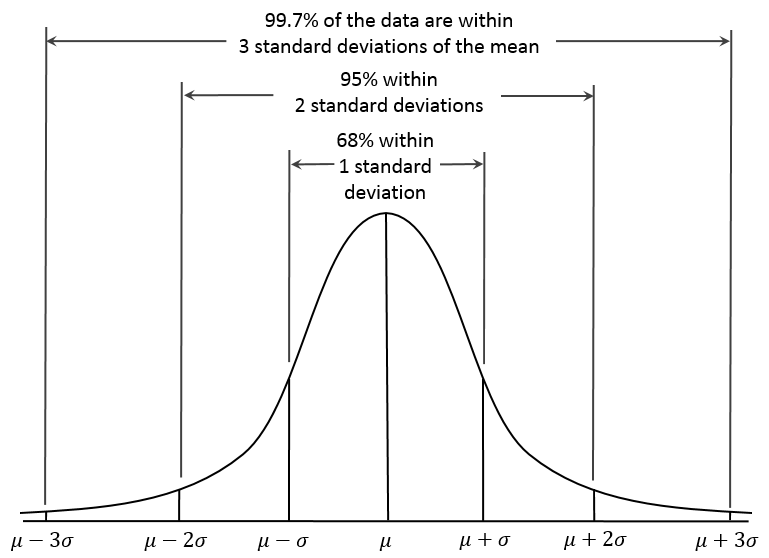

In [4]:
Image('pictures/stats1.png', width=400)

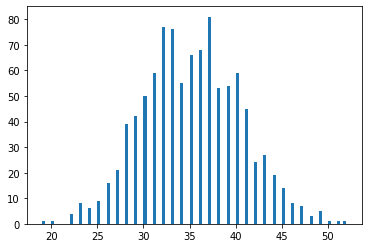

In [5]:
# throwing N (1-6 dices) N times - distribution

import random

Nthrow = 1000
Ndices = 10
Nlist = [sum([random.randint(1,6) for i in range(Ndices)]) for i in range(Nthrow)]

plt.hist(Nlist,bins=99);

## Стандартизация
**Стандартизация** - преобразование полученных данных в стандартную Z-шкалу (Z-scores) со средним $M_z = 0$ и$D_z = 1$  
$$Z_i = \frac{x_i - \bar{X}}{sd}$$  

$Z_i$ = Z-score (измеряется в сигмах в ГС, и мю в Выборках)  
$x_i$ = известное значение  
$\bar{X}$ = среднее значение  
$sd$ = стандартное отклонение $\sqrt{D}$  

По итогу новое среднее будет = 0, а стандартное отклонение = 1  
  
**Пример:**  
рост человека 186.2 см, при том что средний рост 175 и стандартное отклонение 8  
$Z_i = \frac{(186,2 - 175)}{8} = 1.4$  
Отклонение роста 186.2 от среднего $= 1.4sd$ для выборки  
для Генеральной совокупности было бы $1.4\sigma$  

In [6]:
# Найти процент опредленной сигма в одну сторону. Тут дано для 0.5 sigma
print(1 - stats.norm.cdf(0.5))

0.3085375387259869


#### Посчитать Standart Error (SE)
$SE = \frac{sd}{\sqrt{n}}$
#### Посчитать Доверительный интервал
#### 99%
$ \bar{X} \pm 2.58 SE $
#### 95%
$ \bar{X} \pm 1.96 SE $

**Задача:**    
На выздоровление в-среднем тратится 20 дней. $M = 20$  
Выборка из 64 человек. $N = 64$  
У нового препарата на выздоровление тратится в-среднем 18.5 дней $\bar{X} = 18.5$  
Стандартное отклонение 4 $sd = 4$  
  
  
1). Вводим нулевую гипотезу, что новый препарат ничего не меняет. Среднее значение выздоровление остается равно 20.   
$H_0 : M_{новыйпреп} = 20$  
  
  
  
2). Вводим альтернативную гипотезу, что новый препарат меняет. Среднее значение выздоровления не равно 20.  
$H_1 : M_{новыйпреп} != 20$  
  
  
  
3). Рассматриваем нулевую гипотезу.  
- посчитаем стандартную ошибку $SE = \frac{sd}{\sqrt{n}} = \frac{4}{\sqrt{64}} = 0.5$
- сделаем Z-преобразование $Z = \frac{\bar{X}-M}{SE} = \frac{18.5 - 20}{0.5} = -3$  
- получается, что если реальное значение среднего 20, то мы отклонились от него на -3 сигмы
  
  
4). Рассматриваем альтернативную гипотезу
- заходим на онлайн кальк https://gallery.shinyapps.io/dist_calc/ 
- выставляем среднее 0, отклонение 1 (мы работаем в Z чегототам)
- ставим both tales [-3:3] и получаем вероятность выпадения таких хвостов = 0.0027 вероятность КРАЙНЕ МАЛА
- эта величина в 0.0027 это $p$-уровень значимости. При $p < 0.05$ - альтернативная гипотеза верна (скорее всего)
- в нашем случае она <0.05, значит мы берём альтернативную гипотезу как верную
   
Если переводить в сигмы, то если больше 2х сигм, тогда новая гипотеза верна (>95%), что неочень точно на самом деле.  
3 сигмы даст вероятность в 0.003 (>99.7%), что более менее ок

- Ошибка Первого рода (False Positive \/ NEW) - Отклонили $H_0$ хотя она была верна
- Ошибка Второго рода (False Negative \/ NEW) - Отклонили $H_A$ хотя она была верна

In [7]:
# func for finding p_value of '<', '>', '2sided' 

from scipy import stats
import numpy as np

def p_value(z_stat, alternative = 'two-sided'):  
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    if alternative == 'less':
        return stats.norm.cdf(z_stat)
    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

x = 20
x_new = 18.5
n = 64
sd = 4
se = sd / n ** 0.5
z = (x_new - x) / se

print(p_value(z, 'two-sided'))
print(p_value(z, 'less'))
print(p_value(z, 'greater'))

0.002699796063260207
0.0013498980316300933
0.9986501019683699


In [8]:
x = 115
x_new = 118
sd = 9
n = 144

se = sd / n ** 0.5
z = (x_new - x) / se

print(p_value(z, alternative='greater'))

3.167124183311998e-05


### Если число наблюдений <30, то вместо нормального распределения, используется распределение Стьюдента (t-distribution)  
У него есть степени свободы. (количество наблюдений N - 1. Для 25 тестов 24 степени свободы)  


In [9]:
import numpy as np
from scipy import stats

n = 15  # observations
tt = -2 # t_value

pval = stats.t.sf(np.abs(tt), n-1)*2  # two-sided pvalue
print('pvalue = %6.4f' % (pval))

# or (sometimes more accurate)

pval = (1 - stats.t.cdf(np.abs(tt), n-1))*2  # two-sided pvalue
print('pvalue = %6.4f' % (pval))

pvalue = 0.0653
pvalue = 0.0653


In [10]:
### expert analyze

import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt

array1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
array2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = pd.DataFrame({'Выборка1':array1, 'Выборка2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']
df.head()

,Mx,SD,N,SE
Выборка1,100.815,10.246503,20.0,2.291188
Выборка2,75.735,15.458102,20.0,3.456537


In [11]:
# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = t.ppf((1 + p)/2, df['Mx']-1)
print('K =',K)
df['interval'] = K * df['SE']
df.head()

K = [1.98401655 1.99221794]


,Mx,SD,N,SE,interval
Выборка1,100.815,10.246503,20.0,2.291188,4.545754
Выборка2,75.735,15.458102,20.0,3.456537,6.886174


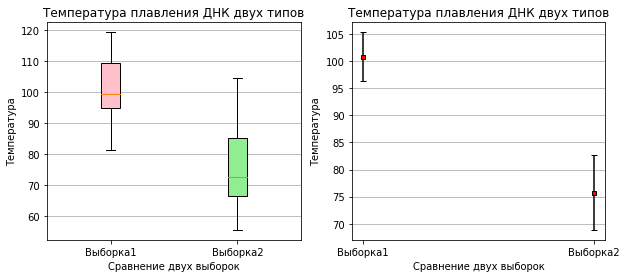

In [12]:
#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# график boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert=True,                       # создаем вертикальные боксы
                     patch_artist=True,               # для красоты заполним цветом боксы квантилей
                     labels=['Выборка1', 'Выборка2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура')
    
plt.show()

## Сравнение двух средних по t-критерию
#### Есть две выборки, нужно узнать отличаются ли они или различия незначимы

- При проверке нулевой гипотезы, мы берем стандартную ошибку, для которой обе ошибки важны одинаково  
$$SE = \sqrt{ \frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2} }$$
  
---------------------------------------------------------------------
- $df$ - число степеней свободы, так же складываем из обоих выборок $(n_1 - 1) + (n_2-1) = n_1+n_2 -2$  
$$df = n_1 +n_2 -2$$
  
---------------------------------------------------------------------
- узнаем разность t-критерия для двух случаев. 
$$t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{ \frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2} }}$$
  
---
- Подставляем t-критерий (это типа как сколько сигм) и число степеней свободы в таблицу https://www.medcalc.org/manual/t-distribution.php \сайт https://gallery.shinyapps.io/dist_calc/ и получаем P-критерий (если <0.05 то 95%)


In [13]:
# Comparing TWO samples 

from scipy import stats

def p_value(t, df, area='two-sided',acс=5):  
    if area== 'two-sided':
        p = 2 * (1 - stats.t.cdf(abs(t), df))
    if area== 'less':
        p = stats.t.cdf(t, df)
    if area== 'greater':
        p = 1 - stats.t.cdf(t, df)
    return round(p, acс)

x1, x2 = 45, 34
sd1, sd2 = 9, 10
n1, n2 = 100, 100

se = ((sd1 ** 2) / n1 + (sd2 ** 2) / n2) **0.5
t = (x1 - x2)/se
df = n1 + n2 - 2
K = stats.t.ppf(1 - 0.025, df)
print(f't: {t} \nK: {K}')
print('p_value:', p_value(t, df, 'two-sided',acс=15)) # accuracy 15 digits

t: 8.176235608718828 
K: 1.9720174778338955
p_value: 3.4e-14


1) Сколько наблюдений?  
 > \>30 - нормальное распределение (normal-distribution)  
  <30 - распределение Стьюдента (t-distribution)
 
2) Сравниваем группы?
 > 2 группы - Сравнение двух средних по t-критерию  
 \>2 групп - Однофакторный дисперсионный анализ

# Однофакторный дисперсионный анализ (для сравнения 2+ групп)

Задача: Есть три группы: 
- 3-2-1
- 5-3-4
- 7-6-5  
Найти верна ли $H_0$ или $H_1$?  
  
1 Находим общее среднее $$\bar{\bar{X}} = \frac{(3+2+1) + (5+3+4) + (7+6+5)}{9} = \frac{36}{9} = 4$$  
  
2 Находим SST (Square Summ Total) $$SST = (3-4)+(1-4)+(2-4)+(5-4)+(4-4)+(3-4)+(7-4)+(6-4)+(5-4) = 30$$  
  
3 Находим число степеней свободы $df$ $$df = N - 1 = 9 - 1 = 8$$  
  
4 SST состоит из:
- SSW (Squara Summ Within)  - "дисперсия" внутри одной группы
- SSB (Square Summ Between) - "дисперсия" между группами  
  
У нас в группах SSW равно:  
$SSW_1 =\bar{x_1} = 2$  
$SSW_2 =\bar{x_2} = 4$  
$SSW_3 =\bar{x_3} = 6$  
  
$$SSW = (3-2)^2+(1-2)^2+(2-2)^2+(5-4)^2+(3-4)^2+(4-4)^2+(7-6)^2+(6-6)^2+(5-6)^2 = 6$$
  
df будет находиться как количество элементов минус количество групп  
$$df = N - m = 9 - 3 = 6$$  
  
SSB будет находиться как кол-во элементов(среднее группы - группового среднего) ++  
$$SSB = 3(2-4)^2 + 3(4-4)^2 + 3(6-4)^2 = 24$$  
df находится как число групп - 1
$$df = m - 1 = 3 - 1 = 2$$  
  
Итого:  
  
SST = 30 | df = 8  
SSB = 24 | df = 2  
SSW = 6  | df = 6  
  
SSB >> SSW => основная "дисперсия" у нас между группами (а не внутри), то есть группы наши разные.  
  
5 Посчитаем Показатель Дисперсионного Анализа $F$  
$$F = \frac{\frac{SSB}{m-1}}{\frac{SSW}{N-m}} = \frac{\frac{24}{2}}{\frac{6}{6}} = 12$$  
  
6 F-распределение или распределение Фишера при правильности нулевой гипотезы близится к нулю. Чем больше, тем более она неправильна.  
Заходим на калькулятор вероятности, вводим F-распределение и наше значение F.  
https://gallery.shinyapps.io/dist_calc/  
Получаем, при  
$df_1 = df_{ssb} = 2$ (Число групп - 1)   
$df_2 = df_{ssw} = 6$ (Число элементов ВСЕГО - Число групп)  
одностороннее всегда (так как всегда положительна).  
F = 12  
Вероятность получить такое распределение 0.008  
  
Вероятность < 0.05 значит отклоняем нулевую гипотезу  
  
---
## Пример:  
Допустим, что при сравнении четырех групп между собой (по 5 наблюдений в каждой группе) вы получили F = 3.5, тогда:  
  
1). https://gallery.shinyapps.io/dist_calc/ 

2). (Число групп - 1)  
$df_{1}=df_{ssb}= 4−1 =3$  
  
3). (Число элементов ВСЕГО - Число групп)  
$df_2=df_{ssw}=(5∗4)−4=16$  
  
4). Upper Tail (Потому что всегда положительна)  
  
5). $F=3.5$  
  
6). $P(X>3.5)=0.0401$  
  
7). P < 0.05 Отклоняем нулевую гипотезу

# Анализ из файла

In [14]:
data = pd.read_csv('csvs/genetherapy.csv')
data.head()

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A


In [15]:
data.describe()

,expr
count,60.000000
mean,96.316667
std,5.619252
min,84.000000
25%,93.000000
50%,96.000000
75%,100.000000
max,107.000000


In [16]:
len(data)

60

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   expr     60 non-null     int64 
 1   Therapy  60 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


## handwritten solution

In [18]:
# 1 Находим общее среднее
X_avg = sum(data.expr) / len(data)
X_avg

96.31666666666666

In [19]:
# 2 Находим SST (Square Summ Total) 
SST = sum(data.expr-X_avg)
SST

2.2737367544323206e-13

In [20]:
# 3 Находим число степеней свободы 𝑑𝑓_sst
df_sst = len(data) - 1
df_sst

59

In [21]:
# 4 Находим SSW_x
A = data[data['Therapy'] == 'A']['expr']
B = data[data['Therapy'] == 'B']['expr']
C = data[data['Therapy'] == 'C']['expr']
D = data[data['Therapy'] == 'D']['expr']

In [22]:
SSW_1 = sum(A) / len(A)
SSW_1

99.73333333333333

In [23]:
SSW_2 = sum(B) / len(B)
SSW_2

98.8

In [24]:
SSW_3 = sum(C) / len(C)
SSW_3

94.4

In [25]:
SSW_4 = sum(D) / len(D)
SSW_4

92.33333333333333

In [26]:
# 5 Находим SSW
SSW = sum((A-SSW_1)**2) + sum((B-SSW_2)**2) + sum((C-SSW_3)**2) + sum((D-SSW_4)**2)
SSW

1302.2666666666669

In [27]:
# 6 Находим df_ssw (num of all values - num of groups)
df_ssw = len(data) -  4
df_ssw

56

In [28]:
# 7 Находим SSB
avg_groups = (SSW_1 + SSW_2 + SSW_3 + SSW_4) / 4
SSB = (len(A) * (SSW_1 - avg_groups)**2) + (len(B) * (SSW_2 - avg_groups)**2) + (len(C) * (SSW_3 - avg_groups)**2) + (len(D) * (SSW_4 - avg_groups)**2)
SSB

560.7166666666667

In [29]:
# 8 Находим df_ssb (num of groups - 1)
df_ssb = 4 - 1
df_ssb

3

In [30]:
# 9 Находим F
F = (SSB/df_ssb) / (SSW/df_ssw)
F

8.037302481143987

In [31]:
# 10 Находим P
# ???

## Scipy method

In [32]:
# v1
A = data[data['Therapy'] == 'A']['expr']
B = data[data['Therapy'] == 'B']['expr']
C = data[data['Therapy'] == 'C']['expr']
D = data[data['Therapy'] == 'D']['expr']
scipy.stats.f_oneway(A,B,C,D)
# print('F:', scipy.stats.f_oneway(A,B,C,D).statistic)
# print('P:', scipy.stats.f_oneway(A,B,C,D).pvalue)

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

In [33]:
# v2
# samples=[list(frame) for group,frame in data.groupby('Therapy')['expr']]
# stats.f_oneway(*samples)

In [34]:
# v3
grps = pd.unique(data.Therapy.values)
d_data = { grp:data['expr'][data.Therapy == grp] for grp in grps }
scipy.stats.f_oneway(d_data['A'],d_data['B'],d_data['C'],d_data['D'])

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

## Visualize 

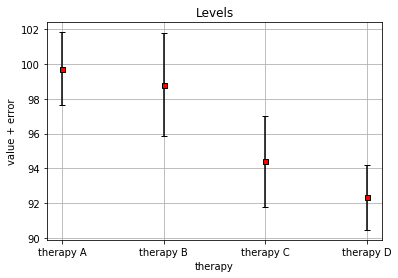

In [35]:
# v1
import statistics 

grps = pd.unique(data.Therapy.values)
A = data[data["Therapy"] == "A"]["expr"]
Aavg = sum(A)/len(A)
Aerr = statistics.stdev(A)
B = data[data["Therapy"] == "B"]["expr"]
Bavg = sum(B)/len(B)
Berr = statistics.stdev(B)
C = data[data["Therapy"] == "C"]["expr"]
Cavg = sum(C)/len(C)
Cerr = statistics.stdev(C)
D = data[data["Therapy"] == "D"]["expr"]
Davg = sum(D)/len(D)
Derr = statistics.stdev(D)
list = ['therapy A', 'therapy B', 'therapy C', 'therapy D']
listAVG = [Aavg, Bavg, Cavg, Davg]
listERR = [Aerr/2, Berr/2, Cerr/2, Derr/2]
# print(list, listAVG)

plt.errorbar(x=list, y=listAVG, yerr=listERR, color="black", capsize=3, marker="s", markersize=5, mfc="red", mec="black", fmt='o')
plt.title('Levels')
plt.grid()
plt.xlabel('therapy')
plt.ylabel('value + error')
plt.show()

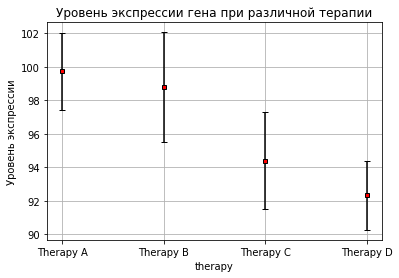

In [36]:
# v2
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt

#выставляем уровень значимости
p = 0.95

#обрабатываем сырые данные из csv файла, находим объем, среднее и стандартное отклонение выборки
data = pd.read_csv("csvs/genetherapy.csv", sep=',')
data_agg = data.groupby(['Therapy']).agg(['count','mean','std'])

#для каждой выборки высчитываем интервал по формуле для t-распределения: (K * se), где 
#K t-value, зависит от степеней свободы df = n-1 и целевого значения вероятности p, 
#se - стандартная ошибка среднего = std/sqrt(n), std - стандартное отклонение выборки, n - количество элементов 
data_agg['interval'] = t.ppf((1 + p)/2, data_agg['expr']['count']-1)*data_agg['expr']['std']/(data_agg['expr']['count'] ** .5)

#cтроим доверительные интервалы на графике
plt.errorbar(x='Therapy ' + data_agg.index, y=data_agg['expr']['mean'], yerr=data_agg['interval'], color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')
plt.title('Уровень экспрессии гена при различной терапии')
plt.grid()
plt.xlabel('therapy')
plt.ylabel('Уровень экспрессии')
plt.show()

In [37]:
p = 0.95

#обрабатываем сырые данные из csv файла, находим объем, среднее и стандартное отклонение выборки
data = pd.read_csv("csvs/genetherapy.csv", sep=',')
data_agg = data.groupby(['Therapy']).agg(['count','mean','std'])

data_agg

expr                     
        count       mean       std
Therapy                           
A          15  99.733333  4.165619
B          15  98.800000  5.894307
C          15  94.400000  5.193402
D          15  92.333333  3.735289

# Множественные сравнения в ANOVA

- Берем нашу выборку. 
- Вводим количество сравниваемых групп (допустим 3)
- Вводим количество объектов в каждой группе (допустим 30)
- Вводим порог, Если МЕНЬШЕ (допустим 0.05), то различия ДОСТОВЕРНЫ  
  
Показатель Альфа - то значение p-уровня значимости, ниже которого мы считаем различия ДОСТОВЕРНЫМИ  
  
Увеличивая кол-во групп (гипотез), мы будем увеличивать вероятность того, что какие-то две будут различаться.  
  
(изначально у нас одна генеральная совокупность и различий у выборок нет)  
При 2 группах вероятность различий в группах будет 0.05=5%  == группы не отличаются (ЭТО ПРАВИЛЬНО)  
При 3 группах вероятность различий станет 0.2=20% == группы ОТЛИЧАЮТСЯ (ЭТО НЕПРАВИЛЬНО)  
При 8 группах вероятность различий будет 50% итд  
  
Чтобы считать зависимость нужного нам порога от кол-ва разных гипотез, используем формулу:  
кол-во гипотез * (кол-во гипотез минус один) / 2  
- Считаем нужное нам количество сравнений ( 9*(9-1)/2 = 36 для 9и гипотез )

## Поправка Бонферрони - вероятность альфа деленая на кол-во сравнений  
допустим, для 9 гипотез = 36 сравнений. Альфа будет 0.05 => 0.05/36 = 0,001388889  
- Подставляем Поправку Бонферрони вместо Альфа (вместо 0.05 ставим 0,001388889)
  
``Минусы такого подхода, что при большом количестве сравнений (что часто в реальной жизни), почти нереально найти значимые различия. Мы будем упускать реальные открытия.``

## Критерий Тьюки (Tukey HSD)
Менее консервативный вариант Поправки Бонферрони (будет отмечаться больше значимых различий)  

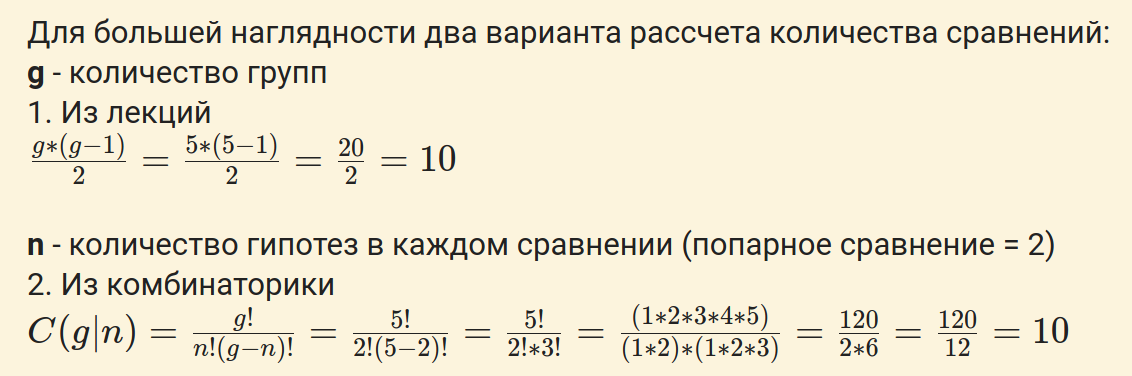

In [38]:
Image('pictures/stats2.png', width=600)

In [39]:
import math
g = 5
n = 2
print(math.factorial(g) / (math.factorial(n) * math.factorial(g-n)))

10.0


# Двухфакторный дисперсионный анализ  
## (Two-way analysis of variance)

Применяется, когда у нас несколько факторов каждый из которых может влиять или не влиять на результат

In [40]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

URL = 'https://stepik.org/media/attachments/lesson/9250/birds.csv'
data = pd.read_csv(URL)

formula = 'var4 ~ hormone*sex'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                 sum_sq    df         F    PR(>F)
hormone        0.847472   1.0  0.086528  0.769653
sex            0.119762   1.0  0.012228  0.912318
hormone:sex   89.483384   1.0  9.136390  0.003682
Residual     587.650394  60.0       NaN       NaN


Для того чтобы проводить Дисперсионный анализ должно выполняться два условия:
1. Нормальность распределения нашей зависимой переменной (то что ищем)
2. Гомогенность дисперсий (чтобы везде дисперсии были +- равны). Проверяется через Levene's Test for Homogeneity of Variance

# Корреляция

Ковариация (**коэффициент Вариации**) - мера зависимости 2 случайных величин  
$$cov = \frac{\sum{(x_i-\bar{X})*(y_i-\bar{Y})}}{N-1}$$  
  
**Коэффициент Корреляции** [-1:1] - показатель силы и направления взаимосвязи 2 количественных переменных   
$$r_{xy} = \frac{cov}{sd_x * sd_y}$$  
  
Квадрат Коэф Корреляции = **Коэффициент детерминации**  
$R^2$ - показывает в какой степени дисперсия одной переменной обусловлена влиянием другой переменной [0:1]  

In [41]:
# Find correlation coef in 2 samples
list1 = [4,5,2,3,1]
list2 = [2,1,4,3,5]

# numpy
print(np.corrcoef(list1,list2)[0,1])
# scipy
print(scipy.stats.stats.pearsonr(list1, list2)[0])
# scipy-linregres
print(scipy.stats.linregress(list1, list2))

-0.9999999999999999
-1.0
LinregressResult(slope=-1.0, intercept=6.0, rvalue=-1.0, pvalue=1.2004217548761408e-30, stderr=0.0)


## Корреляция Пирсона
  
Делим мысленно каждый график вертикальной и горизонтальной линией (линии рисуются по средним значениям)
Получаем четыре квадрата
1-2
3-4
Если большинство точек лежит в 3и2, то корреляция есть и она положительна
Если большинство точек лежит в 1и4, то корреляция есть и она отрицательна
В любых других вариантах, корреляция Пирсона будет близиться к нулю.
  
То есть зависимость должна быть линейная. Если она лучше всего описывается кривой - то корреляция Пирсона уже не подходит.

## Корреляция Спирмена
По сути та же корреляция Пирсона, но она менее чуствительна к выборсам, так как считает не конкретные значения, а порядковый номер точки по Х и У

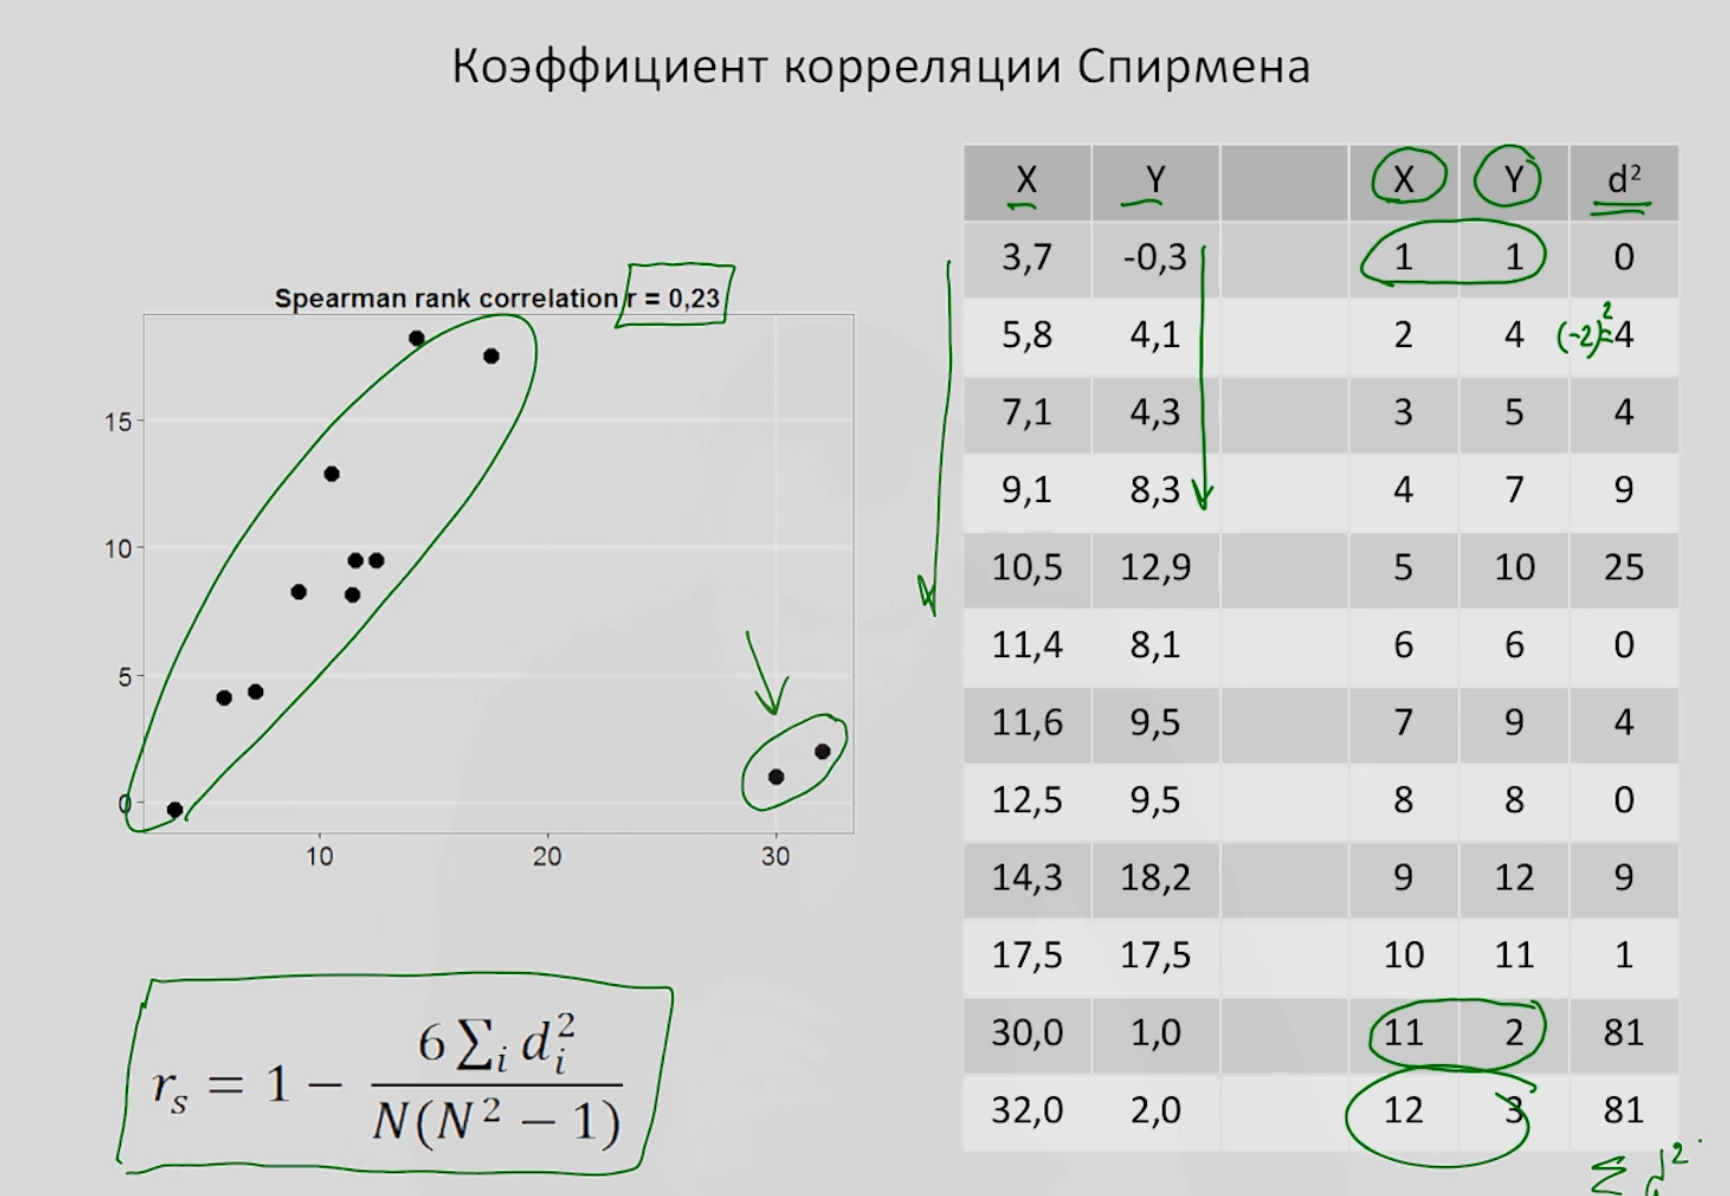

In [42]:
Image('pictures/stats3.png', width=600)

# Регрессия с одной переменной

Принято на графике называть  
$X$ - Независимая переменная (предиктор)  
$Y$ - Зависимая переменная  

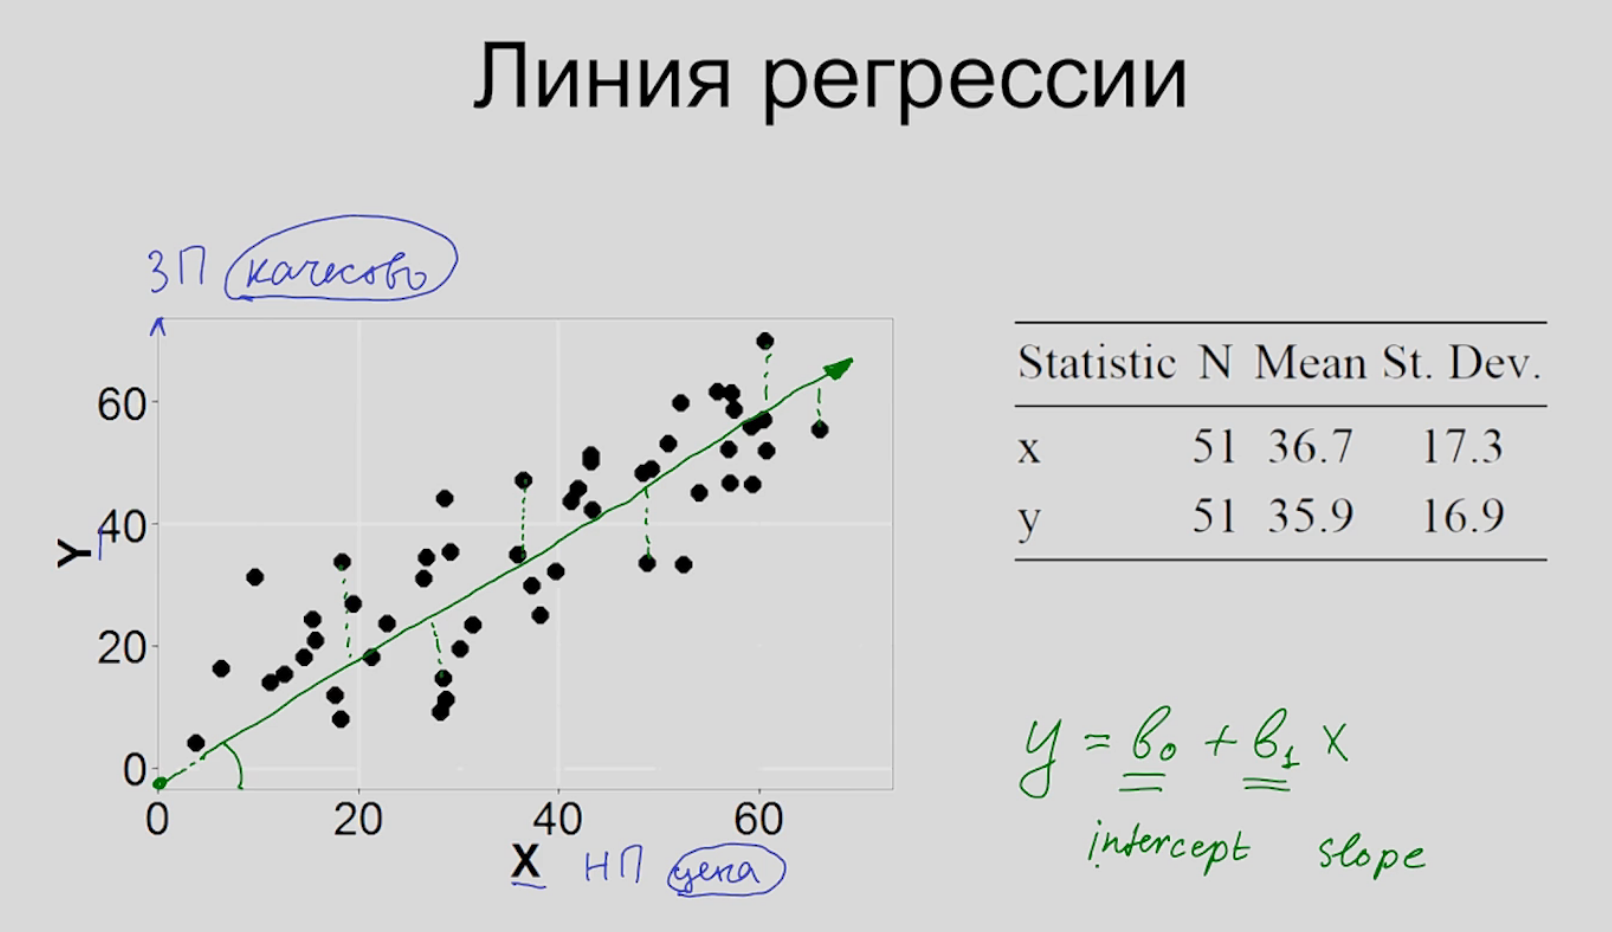

In [43]:
Image('pictures/stats4.png', width=600)

**intercept** $b_0$ - свободный член, показывает где наша линия пересекает ось $Y$  
**slope** $b_1$ - направление и угол наклона  
  
## Метод наименьших квадратов
МНК - метод нахождения оптимальных параметров линейной регрессии, чтобы сумма квадратов ошибок была минимальной.  
  
Ошибки в данном случае, это разность реального положения от предсказываемой прямой.  
  
$b_1 = \frac{sd_y}{sd_x}*r_{xy}$  
$b_0 = \bar{Y}-b_1*\bar{X}$  
  
Где $\bar{Y}$ - Среднее значение по Y  
$\bar{X}$ - Среднее значение по X  
  
t-критерий позволяет проверить гипотезу о взаимосвязи двух переменных, сравнивая реальный коэф b1 с предположением что он равен нулю.  
  
$t = \frac{b_1}{SE}$  
$df = N - 2$  


## Коэффициент детерминации
  
$R^2$ - доля дисперсии зависимой переменной (Y), объясняемая регресионной моделью.  
  
$R^2 = 1 - \frac{SS_{остатков}}{SS_{total}}$ , где  
$SS$ - Square Sum = сумма квадратов  
$SS_{остатков}$ - расстояние от наблюдения до регрессионной прямой (в квадрате)  
$SS_{total}$ - расстояние от наблюдения до среднего значения (в квадрате)  
  


## Условия применения линейной регрессии с одним предиктором
Если мы хотим исследовать взаимосвязь двух количественных переменных
1. Построить скаттерплот и проверить **Линейна ли взаимосвязь**
2. Построить распределение наших остатков гистограммой **Нормальное ли распределение**
3. Построить QQ-plot чтобы увидеть **не изменяется ли поведение впоследствии**

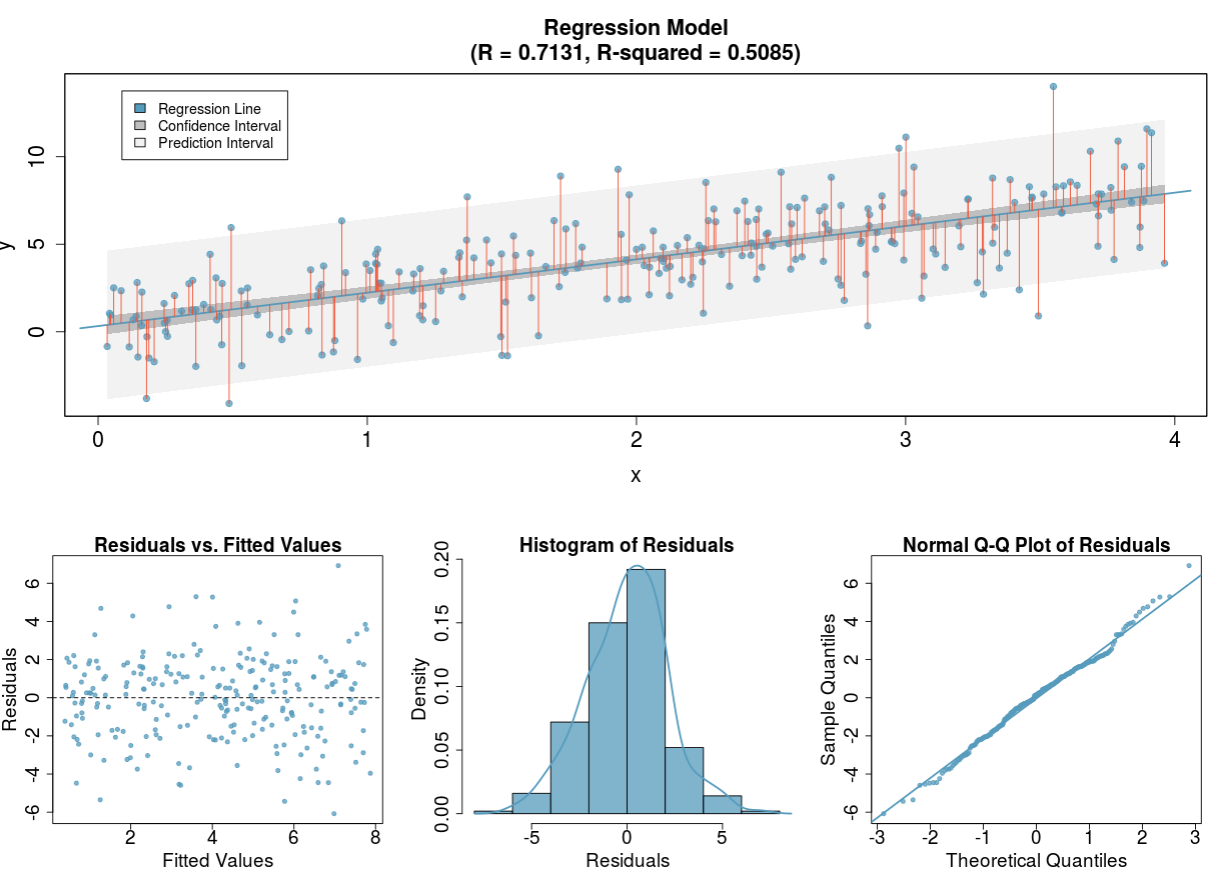

In [44]:
Image('pictures/stats5.png', width=600)

In [45]:
df = pd.read_csv('csvs/states.csv')
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [46]:
# if we need only 2 columns
# df = df[['poverty','hs_grad']]

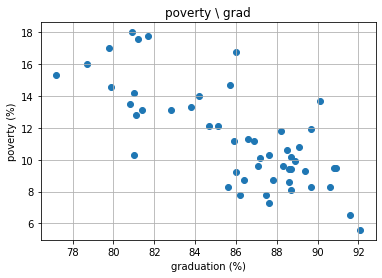

In [47]:
# scatterplot of our data
plt.scatter(df['hs_grad'], df['poverty'])
plt.grid()
plt.xlabel('graduation (%)')
plt.ylabel('poverty (%)')
plt.title('poverty \ grad')
plt.show()

In [48]:
# correlation coef R = -0.746
scipy.stats.linregress(df['hs_grad'], df['poverty'])

LinregressResult(slope=-0.6212167177940106, intercept=64.78096577010209, rvalue=-0.7468582531582505, pvalue=3.10882981031841e-10, stderr=0.0790164710017928)

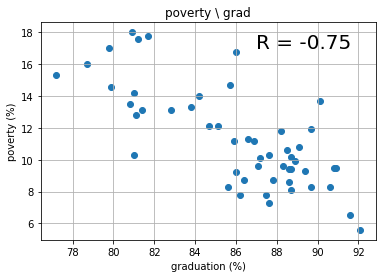

In [49]:
# scatterplot with R-text
plt.scatter(df['hs_grad'], df['poverty'])
plt.grid()
plt.xlabel('graduation (%)')
plt.ylabel('poverty (%)')
plt.title('poverty \ grad')
plt.text(x=87,y=17,s='R = -0.75', fontsize=20)
plt.show()

In [50]:
# Descriptive statistics table
N1 = len(df['poverty'])
N2 = len(df['hs_grad'])
M1 = df['poverty'].mean()
M2 = df['hs_grad'].mean()
sd1 = df['poverty'].std()
sd2 = df['hs_grad'].std()
min1 = df['poverty'].min()
min2 = df['hs_grad'].min()
max1 = df['poverty'].max()
max2 = df['hs_grad'].max()

dtdata = {'Statistic':['poverty', 'hs_grad'], 'N':[N1,N2], 'Mean':[M1,M2], 'St. Dev':[sd1,sd2], 'Min':[min1,min2], 'Max':[max1,max2]}
dt = pd.DataFrame(data=dtdata)
dt.style.hide_index()

Statistic,N,Mean,St. Dev,Min,Max
poverty,51,11.349020,3.099185,5.600000,18.000000
hs_grad,51,86.011765,3.725998,77.200000,92.100000


In [51]:
df['poverty'].std()

3.099185218667617

In [52]:
# 1. build regression model y = b0 + b1*x
# b0 - intercept
b0 = round(scipy.stats.linregress(df['hs_grad'], df['poverty']).intercept, 2)
print('b0-intercept', b0)
# b1 - slope
b1 = round(scipy.stats.linregress(df['hs_grad'], df['poverty']).slope, 2)
print('b1-slope', b1)
print(f'y = {b0} + {b1}*x')

b0-intercept 64.78
b1-slope -0.62
y = 64.78 + -0.62*x


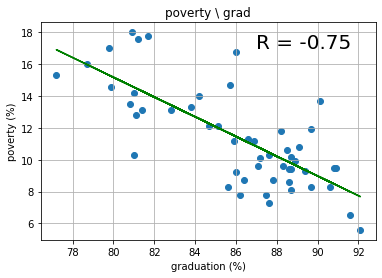

In [53]:
# scatterplot with regression line
plt.scatter(df['hs_grad'], df['poverty'])
plt.text(x=87,y=17,s='R = -0.75', fontsize=20)
y = b0 + b1*df['hs_grad']
plt.plot(df['hs_grad'], y, color='green')
plt.grid()
plt.xlabel('graduation (%)')
plt.ylabel('poverty (%)')
plt.title('poverty \ grad')
plt.show()

In [54]:
# to reject H_0 we need our P < 0.05
print(scipy.stats.linregress(df['hs_grad'], df['poverty']).pvalue) # <0.05 => rejected

3.10882981031841e-10


In [55]:
# 2. find determination coef R^2
R2 = scipy.stats.linregress(df['hs_grad'], df['poverty']).rvalue ** 2
print(f'R2 = {R2}')

R2 = 0.5577972503105934


In [56]:
# 3. predict poverty by grad
#####

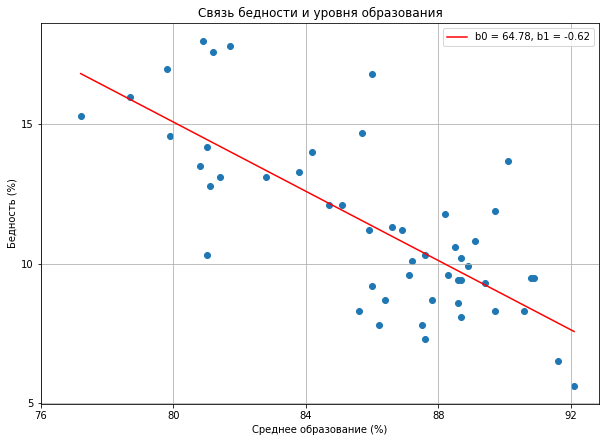

             Estimate  Std.Error  t value      Pr(>|t|)
(Intercept)   64.7810     6.8026     9.52  9.940660e-13
hs_grand      -0.6212     0.0790    -7.86  3.108830e-10

Multiple R-squared: 0.5578,
F-statistic(1,49) = 61.81, p-value = 3.10882981031842e-10


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

data=pd.read_csv('csvs/states.csv', sep=',')

# рассчет ковариационной матрицы двух векторов, на выходе ковариация и дисперсии каждого из массивов, 
# или можно рассчитать вручную по формулам из уроков cov - урок 3_1 третье видео; D - урок 1_5 третье видео
X = data['hs_grad']
Y = data['poverty']
ssxm, ssxym, ssyxm, ssym = np.cov(X,Y).flat

# рассчет корреляции по формуле из урока 3_1 третье видео: r = cov/stdx*stdy, 
# т. к. в ковариационной матрице у нас дисперсии, то в знаменателе нужно взять квадратный корень 
if ssxm == 0 or ssym == 0:
    r = 0
else:
    r = ssxym / (ssxm * ssym)**0.5
    
# расчет slope и intercept из урока 3_3 второе видео: slope = (stdy/stdx) * r
slope = r * (ssym/ssxm)**0.5
intercept = np.mean(Y) - slope * np.mean(X)

df = len(X) - 2
# рассчет t - значения, вероятности p и стандартной ошибки для X параметра подсмотренно тут: 
# https://github.com/scipy/scipy/blob/v1.4.1/scipy/stats/_stats_mstats_common.py#L15-L144
tx = r * np.sqrt(df / ((1.0 - r)*(1.0 + r)))
sterrestx = np.sqrt((1 - r**2) * ssym / ssxm / df)
px = 2 * stats.t.sf(np.abs(tx), df)

# Находим сумму квадратов по параметру X
s = [i**2 for i in X]
sterresty = (sterrestx**2/51*sum(s))**0.5

# рассчет t - значения, вероятности p и стандартной ошибки для Y параметра подсмотренно тут: 
# https://en.wikipedia.org/wiki/Simple_linear_regression
ty = intercept/sterresty
py = 2 * stats.t.sf(np.abs(ty), df)

# рассчет F-статистики подсмотренно тут:
# https://www.chem-astu.ru/science/reference/fischer.html
F = r**2/(1-r**2)*df
p_val = stats.f.sf(F, 1, df)

# создаем таблицу как в лекции
ttlinear = pd.DataFrame(data = {
    'Estimate':[round(num, 4) for num in [intercept,slope]], 'Std.Error':[round(num, 4) for num in [sterresty, sterrestx]], 
    't value':[round(num, 2) for num in [ty,tx]], 'Pr(>|t|)':[py,px]}, 
                        index = ['(Intercept)','hs_grand'])

# вычисляем остатки
#residuals = Y - intercept - slope*X

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# точечный график
ax1.scatter(X,Y)

# регрессионная прямая
x1=np.linspace(min(X),max(X),51)
y1=intercept + slope*x1
plt.plot(x1,y1,'-r',label='b0 = {}, b1 = {}'.format(round(intercept,2), round(slope,2)))

plt.grid()
plt.title('Связь бедности и уровня образования')
plt.xlabel('Среднее образование (%)')
plt.ylabel('Бедность (%)')
plt.xticks(np.arange(76,93, step=4))
plt.yticks(np.arange(5,18, step=5))
plt.legend(loc='upper right')
plt.show()


print(ttlinear)
print('')
print('Multiple R-squared: {},'.format(round(r**2,4)))
print('F-statistic(1,{}) = {}, p-value = {}'.format(df, round(F,2), p_val))

In [58]:
# Residuals checking example
df = pd.read_csv('csvs/states.csv')
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [59]:
b0 = scipy.stats.linregress(df['hs_grad'], df['poverty']).intercept
b1 = scipy.stats.linregress(df['hs_grad'], df['poverty']).slope
y = b0 + b1*df['hs_grad']

In [60]:
residuals = df['poverty'] - y
len(residuals)

51

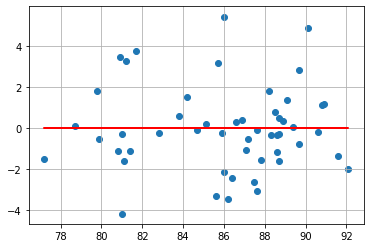

In [61]:
plt.scatter(df['hs_grad'], residuals)
plt.grid()
plt.plot(df['hs_grad'], [0 for i in range(len(residuals))], '-', color='red')

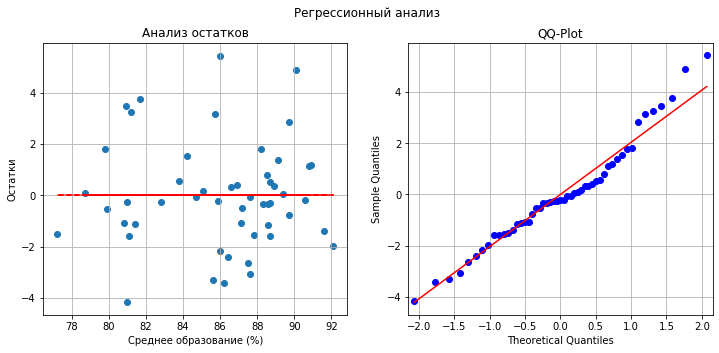

In [62]:
import statsmodels.api as sma

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Регрессионный анализ')
ax1.set_title('Анализ остатков')
ax1.set_xlabel('Среднее образование (%)')
ax1.set_ylabel('Остатки')
ax2.set_title('QQ-Plot')

ax1.scatter(df['hs_grad'], residuals)
ax1.plot(df['hs_grad'], [0]*len(residuals), '--r')
ax1.grid()

sma.qqplot(residuals, line='s', ax=ax2)
ax2.grid()

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           3.11e-10
Time:                        11:35:04   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      9.523      0.0

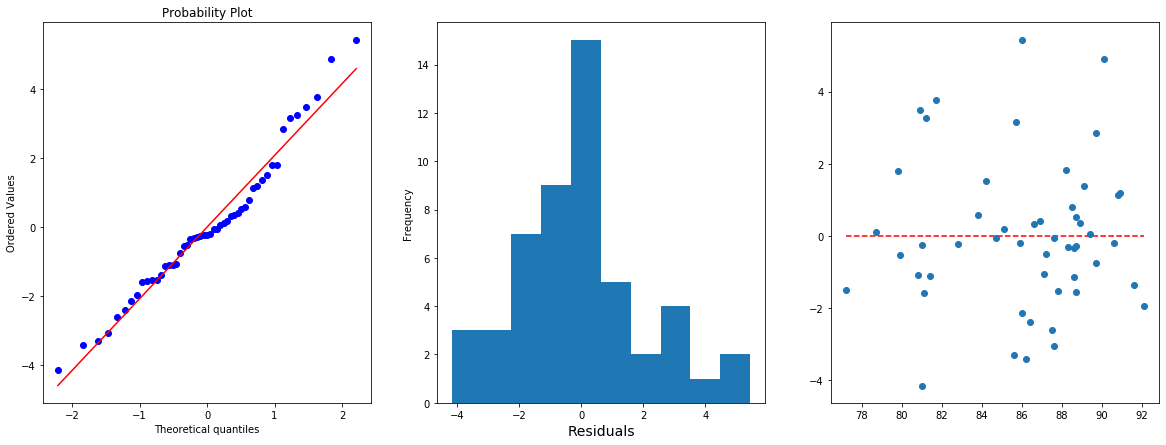

In [63]:
import statsmodels.formula.api as smf
m1 = smf.ols('poverty ~ hs_grad', data=df)
fitted = m1.fit()

# sum info
print(fitted.summary())

plt.figure(figsize=(20,7))
plt.subplot(131)
scipy.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(132)
(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.subplot(133)
plt.plot(df['hs_grad'], fitted.resid, 'o')
plt.hlines(np.mean(fitted.resid), df['hs_grad'].min(), df['hs_grad'].max(), linestyle='--', colors='red')
plt.show()

# Множественная регрессия
  
**Требования к данным**:
* Линейная зависимость переменных
* Нормальное распределение остатков
* Гомоскедастичность (Однородность наблюдений - одинаковая диспа случайных ошибок модели)
* Проверка на мультиколлинеарность (сильная взаимосвязь между переменными например есть в ММ и СМ - the same только будет мешать - избавиться от этого)
* Нормальное распределение переменных (желательно)  

In [64]:
import statsmodels.formula.api as smf
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data = pd.read_csv('csvs/states.csv')
data.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [65]:
lm = smf.ols(formula='poverty ~ metro_res + hs_grad', data=data).fit()
lm.params

Intercept    67.330105
metro_res    -0.038704
hs_grad      -0.618343
dtype: float64

Text(0.5, 0, 'poverty')

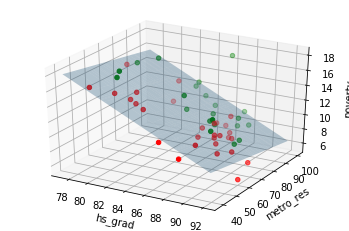

In [66]:
def f(x, y):
    return lm.params.Intercept + lm.params.hs_grad * x  + lm.params.metro_res * y

x = data.hs_grad.sort_values()
y = data.metro_res.sort_values()

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
data_below_serf = data[data['poverty'] < f(data['hs_grad'], data['metro_res'])]
data_above_serf = data[data['poverty'] >= f(data['hs_grad'], data['metro_res'])]
ax.scatter(data_below_serf.hs_grad, data_below_serf.metro_res, data_below_serf.poverty, c='r', marker='o')
ax.scatter(data_above_serf.hs_grad, data_above_serf.metro_res, data_above_serf.poverty, c='g', marker='o')
ax.set_xlabel('hs_grad')
ax.set_ylabel('metro_res')
ax.set_zlabel('poverty')

## Поиск переменной, которая только ухудшает модель (мультиколлинеарность)

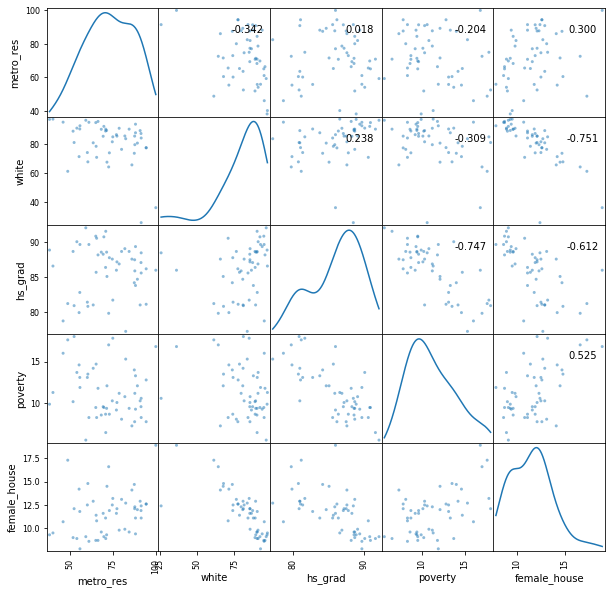

In [67]:
axes = pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='kde', grid=True)
corr = data.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

Значения переменной "кол-во домохозяек" коррелирует почти со всеми остальными, что означает, что она будет только ухудшать нашу модель - от нее следует избавиться

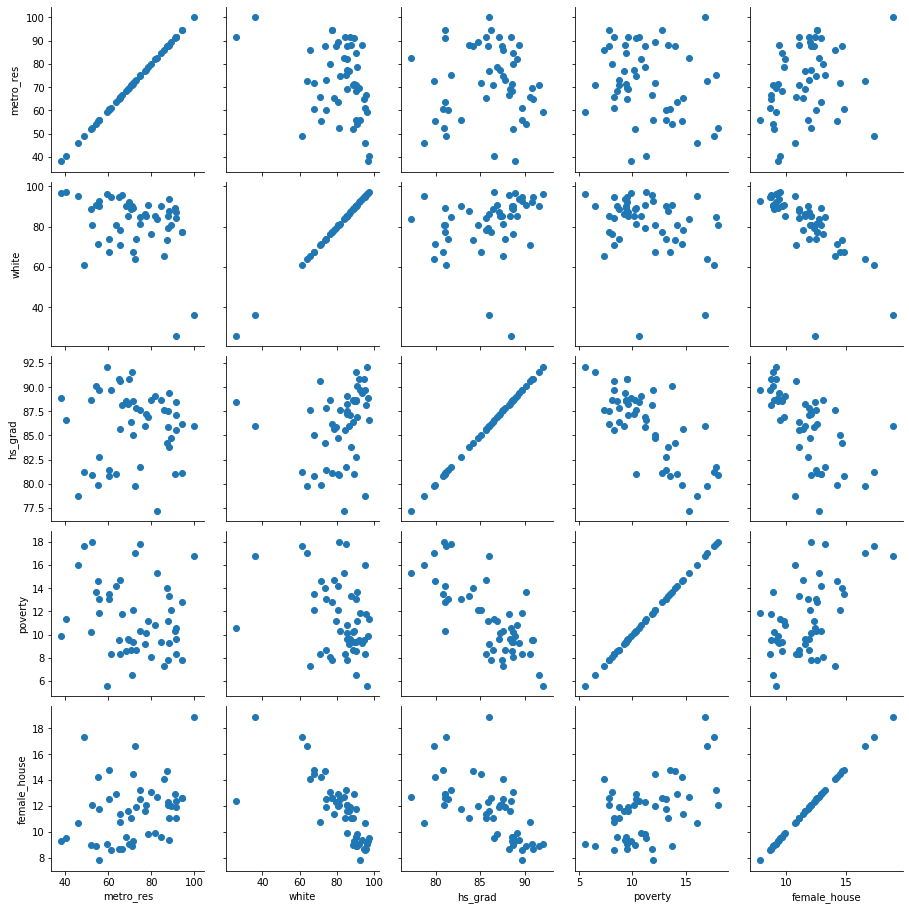

In [68]:
# просто как пример через сиборн без коэффов

import seaborn as sns
grid = sns.PairGrid(data)
grid.map(plt.scatter);

## Выбор модели
* Сначала в модель всовываем все имеющиеся переменные и считаем adj.R-squared
* Удаляем одну из переменных и смотрим увеличился или уменьшился ли R^2
* Берем модель без лишней переменной и повторим эти же действия чтобы найти что еще не важно. 
* Повторяем до тех пор, пока удаление не улучшает показателя R^2

In [69]:
# Найдём такой набор фичей, что R-squared максимальна
feats = {'metro_res', 'white', 'hs_grad', 'female_house'}

# Рекурсивно переберём все сочетания переменных
def brute_force(params: set, formula: str, result: set) -> str:
    if not params:
        result.add(formula.lstrip('+ '))
        return 
    else:
        new_params = params.copy()
        for el in params:
            new_params.remove(el)

            brute_force(new_params, formula + ' + ' + el, result)
            brute_force(new_params, formula, result)

res = set()          
brute_force(feats, '', res)
res.remove('')

# Теперь посчитаем Adjusted R-Square для каждого сочетания и выведем на экран
for formula in res:
    lm = smf.ols(formula='poverty ~ ' + formula, data=df).fit()
    print(f'{lm.rsquared_adj:.2}', formula)

0.61 white + female_house + metro_res + hs_grad
0.56 white + hs_grad
0.17 white + metro_res
0.58 metro_res + hs_grad
0.62 white + metro_res + hs_grad
0.55 hs_grad
0.4 female_house + metro_res
0.26 white + female_house
0.39 white + female_house + metro_res
0.077 white
0.55 female_house + hs_grad
0.022 metro_res
0.55 white + female_house + hs_grad
0.6 female_house + metro_res + hs_grad
0.26 female_house
